Importing libariers , Reding Data 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Uplod Data
data = pd.read_csv('breast-cancer.csv')

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum().sum()
# no null values

0

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1 ,'B':0}) 

In [7]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [8]:
x = data.drop(columns=['diagnosis','id'])
y = data['diagnosis']

discrete_features =[False]*x.shape[1]

def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_regression(x,y,discrete_features = discrete_features )
    mi_scores =pd.Series(mi_scores, name ="MIScores",index=x.columns)
    mi_scores = mi_scores.sort_values(ascending =False)
    return mi_scores

mi_scores = make_mi_scores(x,y,discrete_features)

mi_scores
    

perimeter_worst            0.476123
area_worst                 0.464704
radius_worst               0.455705
concave points_worst       0.438958
concave points_mean        0.436159
perimeter_mean             0.404966
concavity_mean             0.382879
radius_mean                0.364204
area_mean                  0.359956
area_se                    0.337085
concavity_worst            0.316056
perimeter_se               0.274549
radius_se                  0.246221
compactness_worst          0.225323
compactness_mean           0.213742
concave points_se          0.127087
texture_worst              0.123947
concavity_se               0.119703
smoothness_worst           0.100374
symmetry_worst             0.098059
texture_mean               0.096065
smoothness_mean            0.076308
compactness_se             0.074371
fractal_dimension_worst    0.065346
symmetry_mean              0.063225
fractal_dimension_se       0.037253
smoothness_se              0.019079
symmetry_se                0

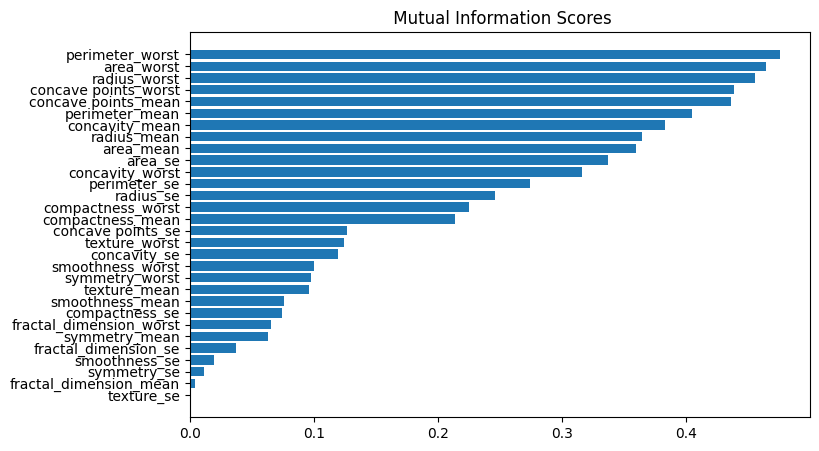

In [9]:
#select important feature 
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title(" Mutual Information Scores")
    #plt.show()
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)


Feature and Target Selection

In [40]:


X = data.drop(columns=['diagnosis','id','texture_se','fractal_dimension_mean','symmetry_se','smoothness_se','fractal_dimension_se','symmetry_mean','symmetry_worst','texture_mean','smoothness_worst','concavity_se','texture_worst','perimeter_se'])
Y = data['diagnosis']

X

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,area_se,compactness_se,concave points_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
0,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,1.0950,153.40,0.04904,0.01587,25.380,184.60,2019.0,0.66560,0.7119,0.2654,0.11890
1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.5435,74.08,0.01308,0.01340,24.990,158.80,1956.0,0.18660,0.2416,0.1860,0.08902
2,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.7456,94.03,0.04006,0.02058,23.570,152.50,1709.0,0.42450,0.4504,0.2430,0.08758
3,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.4956,27.23,0.07458,0.01867,14.910,98.87,567.7,0.86630,0.6869,0.2575,0.17300
4,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.7572,94.44,0.02461,0.01885,22.540,152.20,1575.0,0.20500,0.4000,0.1625,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,1.1760,158.70,0.02891,0.02454,25.450,166.10,2027.0,0.21130,0.4107,0.2216,0.07115
565,20.13,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.7655,99.04,0.02423,0.01678,23.690,155.00,1731.0,0.19220,0.3215,0.1628,0.06637
566,16.60,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.4564,48.55,0.03731,0.01557,18.980,126.70,1124.0,0.30940,0.3403,0.1418,0.07820
567,20.60,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.7260,86.22,0.06158,0.01664,25.740,184.60,1821.0,0.86810,0.9387,0.2650,0.12400


Random Forest Classifier

In [41]:
# Split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

model1= RandomForestClassifier( random_state=42)
model1.fit(X_train,y_train)
#pr
y_pre= model1.predict(X_val)
accuarcy = accuracy_score(y_val,y_pre)

accuarcy

0.956140350877193

In [34]:
from sklearn.metrics import confusion_matrix 
con_matrix = confusion_matrix(y_val,y_pre)
print("Confusion Matrix For RandomForestClassifier: ")

print("____"*15)

print("num of Ture Positive : ",con_matrix[1][1])
print("num of Ture Negative : ",con_matrix[0][0])
print("num of False Positive : ",con_matrix[0][1])
print("num of false Negative : ",con_matrix[1][0])



confusion matrix For RandomForestClassifier: 
____________________________________________________________
num of Ture Positive :  40
num of Ture Negative :  69
num of False Positive :  2
num of false Negative :  3


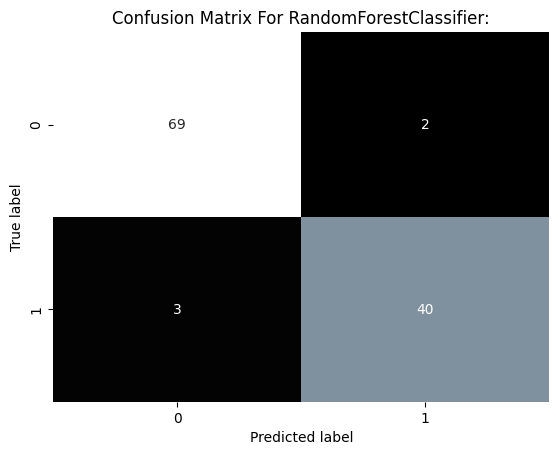

In [35]:
sns.heatmap(con_matrix,annot =True, fmt='d',cmap='bone',cbar=False)
plt.title("Confusion Matrix For RandomForestClassifier")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression 

model2 = LogisticRegression(max_iter=10000,random_state=42)
model2.fit(X_train,y_train)
y_pre2= model2.predict(X_val)
accuarcy = accuracy_score(y_val,y_pre2)

accuarcy

0.9824561403508771

In [37]:

con_matrix2 = confusion_matrix(y_val,y_pre2)
print("Confusion Matrix For LogisticRegression : ")

print("____"*15)

print("num of Ture Positive : ",con_matrix2[1][1])
print("num of Ture Negative : ",con_matrix2[0][0])
print("num of False Positive : ",con_matrix2[0][1])
print("num of false Negative : ",con_matrix2[1][0])

Confusion Matrix For LogisticRegression : 
____________________________________________________________
num of Ture Positive :  41
num of Ture Negative :  71
num of False Positive :  0
num of false Negative :  2


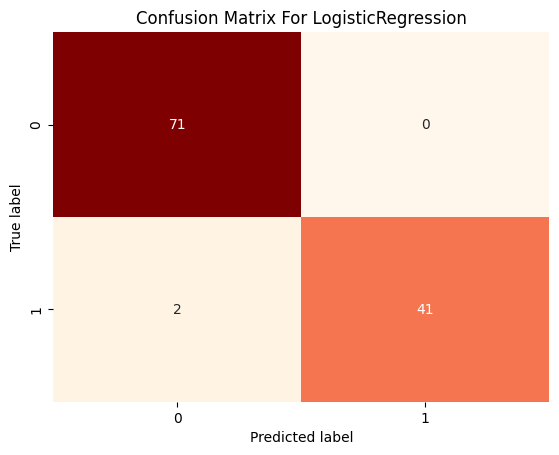

In [38]:
sns.heatmap(con_matrix2,annot =True, fmt='d',cmap='OrRd',cbar=False)
plt.title("Confusion Matrix For LogisticRegression")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Best Algortihm for this Data is Logistic Regression whith

# Accuracy  98.24%